# 2.02 Figure 2

---

Author: Riley X. Brady

Date: 11/18/2020

This figure plots all of the 1000 m and 200 m crossing locations for all particles. See notebooks 1.01 and 1.02 for the computation of these crossing locations from the original particel trajectories.

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
import figutils
import xarray as xr
import proplot as plot
from figutils import BOUNDS

In [2]:
print(f"xarray: {xr.__version__}")
print(f"proplot: {plot.__version__}")

xarray: 0.16.1
proplot: 0.6.4


Load in the model bathymetry for the background of the figure.

In [3]:
# Bottom Depth
depth = xr.open_dataset("../data/bottomDepth.0.5x0.5.nc")
depth = depth.where(depth.lat < -25, drop=True).bottomDepth

# Coarsen to make it speedier to plot
depth = depth.coarsen({"lat": 2, "lon": 2}).mean()

Load in the 1000 m and 200 m crossing locations (see notebooks 1.01 and 1.02 for the creation of these crossing locations).

In [4]:
deep_crossing = xr.open_dataset("../data/postproc/1000m.crossing.locations.nc")
deep_lon = deep_crossing["lon_crossing"]
deep_lat = deep_crossing["lat_crossing"]

shallow_crossing = xr.open_dataset("../data/postproc/200m.crossing.locations.nc")
shallow_lon = shallow_crossing["lon_crossing"]
shallow_lat = shallow_crossing["lat_crossing"]

## Visualization

A little extra post-viz was done in Illustrator to add region names.

/glade/work/rbrady/miniconda3/envs/brady-carbonpathways/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'small' was renamed to text.labelsize in version 0.6.
/glade/work/rbrady/miniconda3/envs/brady-carbonpathways/lib/python3.8/site-packages/proplot/config.py:554: ProPlotWarning: rc setting 'large' was renamed to text.titlesize in version 0.6.
/glade/work/rbrady/miniconda3/envs/brady-carbonpathways/lib/python3.8/site-packages/proplot/figure.py:1158: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  return super().colorbar(*args, cax=cax, **kwargs)


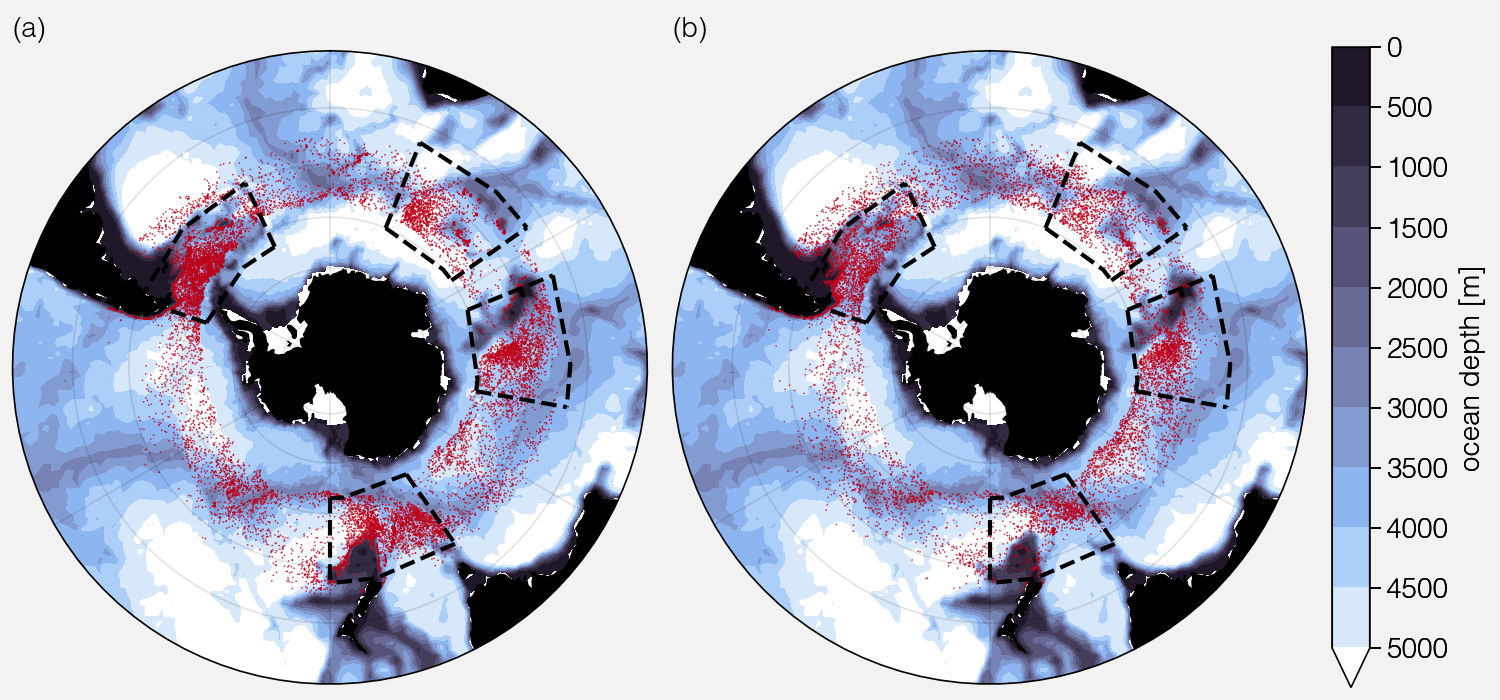

In [5]:
plot.rc.fontname = 'Helvetica Light'  # I added this to my custom proplot config folder.
plot.rc.small = 10
plot.rc.large = 10
plot.rc["land.zorder"] = 5

plot.rc.reso = "lo"
f, axs = plot.subplots(proj="spstere", figsize=(7.5, 3.5), ncols=2)

p = axs.contourf(
    depth.lon,
    depth.lat,
    depth,
    levels=plot.arange(0, 5000, 500),
    cmap="dusk_r",
    extend="max",
    globe=True,
    alpha=1.0,
)
cbar = f.colorbar(p[0], loc="r", label="ocean depth [m]")
cbar.ax.invert_yaxis()

# Deep upwelling
lons = deep_lon
lats = deep_lat
axs[0].scatter(
    lons,
    lats,
    marker=".",
    color="scarlet",
    markeredgecolor="None",
    markersize=1.5,
    alpha=0.8,
    rasterized=True,
)

# Shallow upwelling
lons = shallow_lon.where(shallow_lat < -45, drop=True)
lats = shallow_lat.where(shallow_lat < -45, drop=True)
axs[1].scatter(
    lons,
    lats,
    marker=".",
    color="scarlet",
    markeredgecolor="None",
    markersize=1.5,
    alpha=0.8,
    rasterized=True,
)

axs.format(land=True, boundinglat=-30, abc=True, abcstyle="(a)")

for ax in axs:
    x0, x1, y0, y1 = BOUNDS["drake"]
    figutils.plot_box(ax, x0, x1, y0, y1)
    figutils.plot_box(ax, 145, 180, -63, -47)
    figutils.plot_box(ax, 68, 100, -60, -43)
    figutils.plot_box(ax, 22, 55, -60, -43)